Code to find if a multi star system is bound or not. First input the mass, relative position of the stars and their radial velocity. The code finds the center of mass of the system and uses it to calculate the kinetic energy and potential energy. If the ratio of KE/PE is <1 it is considered to be gravitationally bound system. The code also shows the system configuration in a simple plot

In [3]:
#required libreries

%matplotlib inline
import numpy as np
import astropy.units as u
from astropy.units import cds
cds.enable

import matplotlib.pyplot as plt

# Multi star system, bound or not ?

Here we consider 4 star system.
Set relative positions and velocities for all 4 stellar objects.
The relative position can be obtained from projected distance and velocity is the line of sight velocity (eg Radial Velocity)

The mass unit is $M_\odot$, the position unit is $AU$, and the radial velocity unit is km s$^{-1}$.


In [16]:
#here we use the data for GJ1135 (two components), GJ1136A, GJ1136B

mass=np.array([0.5, 0.5, 0.5, 0.5]) #Mass in Mo
x_au=np.array([0.0, -15.5276, 10234.18908, 10533.4268]) #X (relative) position in AU
y_au=np.array([0.0, -6.4234, 15979.9196, 15823.4968]) #Y (relative) position in AU
v_r=np.array([59.55,  59.55 , 31.56,  30.70]) #Radial velocity in kmps

The center of mass ($\vec{r}_{com}$ and $\vec{v}_{com}$) is calculated as 
$$\vec{r}_{com} = \frac{ 1}{\Sigma_i m_i} \Sigma_i \vec{r}_i m_i$$
$$\vec{v}_{com} = \frac{ 1}{\Sigma_i m_i} \Sigma_i \vec{v}_i m_i.$$

In [17]:
x_com= np.sum(x_au*mass)/np.sum(mass) #x center of mass
y_com= np.sum(y_au*mass)/np.sum(mass) #y center of mass
v_com= np.sum(v_r*mass)/np.sum(mass) #velocity of center of mass

print('r_com = ', (np.array([x_com,y_com])*u.au).to(u.m))
print('v_com = ', np.round(v_com,2), 'km/s')

r_com =  [7.76117055e+14 1.18919061e+15] m
v_com =  45.34 km/s


Display system configuration.


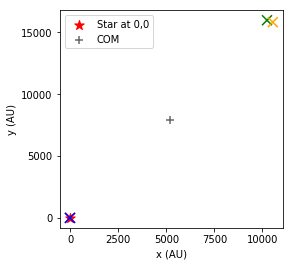

In [24]:
low_lim = 0 #this is the 2nd star in the array
high_lim = len(x_au) #max number of stars

fig=plt.figure( figsize=( 4.0, 4.0) )
ax= plt.subplot()
color_sym=['red','blue','green','orange'] #4 different colors for 4 stars

plt.scatter( x_au[0], y_au[0], color=color_sym[0], s=100, marker='*', label='Star at 0,0') # (x,y)=(0,0) position star, red star marker
plt.scatter( x_au[low_lim:high_lim], y_au[low_lim:high_lim], color=color_sym[low_lim:high_lim], s=100, marker='x', edgecolor='k')
plt.scatter( x_com, y_com, color='black', marker='+', s=50, label='COM', alpha =0.6) #black plus for center of mass

plt.setp( ax, xlabel="x (AU)")
plt.setp( ax, ylabel="y (AU)")

ax.locator_params(axis = 'both', nbins = 5)
ax.legend()

# Is the entire system bound?

Determine binding energy for entire system. It calculates the Kinetic and Potential energies to then determine if the system is bound. The total potential energy of the system is calculated as 
$$E_{pot, tot} = \Sigma_{i\ne j} \frac{-G m_i m_j}{\left|\vec{r}_{i}-\vec{r}_{j}\right|},$$ 
while the total kinetic energy of the system is calculated as
$$E_{kin, tot}= \Sigma_i \frac{m_i \left| \vec{v}_i -\vec{v}_{com}\right|^2 }{2},$$
where $\vec{v}_{com}$ is the velocity in the center of mass frame.

The energies are all calculated and stored in Joules.

In [5]:
nstars=len(x_au)  #number of stars in total
Epot_i=np.zeros(nstars)*u.J #initialise potential energy array
Ekin_i=np.zeros(nstars)*u.J #initialise kinetic energy array

#Kinetic energy for each object
Ekin_i = ( 0.5*mass*u.Msun* ((v_r-v_com)*u.km/u.s)**2  ).to(u.J)

#loop to calculate the potential energy as per the equation above
for i in range(nstars):
    for j in range(nstars):
        if i != j:
            rij=[x_au[i]-x_au[j], y_au[i]-y_au[j]]
            Epot_i[i] += -( mass[i]*mass[j]/( np.linalg.norm(rij))*cds.G*u.Msun*u.Msun/u.au).to(u.J)
print ('Ekin+Epot             Ekin              Epot')
print (np.array([(Ekin_i+Epot_i).T, Ekin_i.T, Epot_i.T]).T * Epot_i.unit)

Ekin+Epot             Ekin              Epot
[[ 7.40892389e+37  1.00380277e+38 -2.62910382e+37]
 [ 7.40892728e+37  1.00380277e+38 -2.62910044e+37]
 [ 9.30445524e+37  9.43971038e+37 -1.35255140e+36]
 [ 1.05194814e+38  1.06547285e+38 -1.35247145e+36]] J


Kinetic-Potential energy ratio for entire system (bound if <1)

In [6]:
print ('KE/PE ratio=',np.round(np.sum(Ekin_i)/np.abs(np.sum(Epot_i)), decimals=3))

KE/PE ratio= 7.266


We can see that the system is not bounded in a quadruple system.